Credit Card Fraud Detection using Scikit-Learn and Snap ML

In [1]:
#!pip install snapml

In [1]:
import warnings
warnings.filterwarnings('ignore')

# from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import gc, sys

In [2]:
df = pd.read_csv('fraudTrain.csv')

In [4]:
df.shape

(1296675, 23)

In [3]:
print(str(len(df)) +' observations can be seen in this dataset')
print(str(len(df.columns)) + ' variables can be found in this data set')
df.head()

1296675 observations can be seen in this dataset
23 variables can be found in this data set


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
#sns.regplot(x= 'amt', y='city' , data= df)
#plt.show()
import seaborn as sns        

In [8]:
df.state.value_counts()

TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: state, dtype: int64

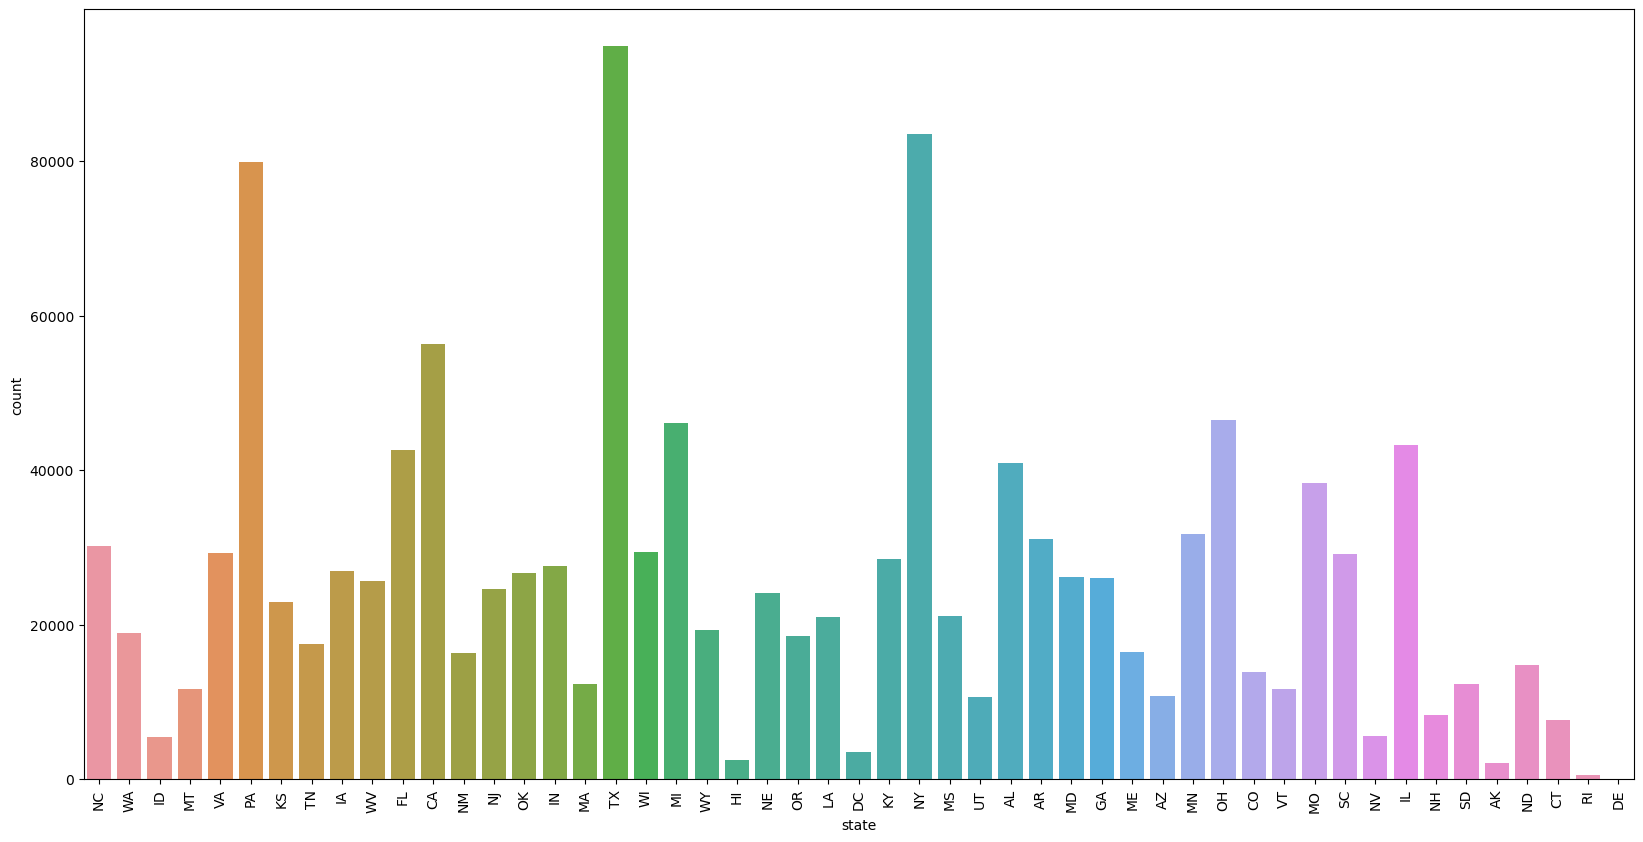

In [7]:
plt.figure(figsize = (20,10))
sns.countplot(x= 'state', data= df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.is_fraud.value_counts()

In [8]:
labels = df.is_fraud.unique()
print(labels)

[0 1]


In [9]:
sizes = df.is_fraud.value_counts().values
sizes

array([1289169,    7506], dtype=int64)

As shown above, the Class variable has two values:

0 (the credit card transaction is legitimate)
1 (the credit card transaction is fraudulent)
Thus, you need to model a binary classification problem. Moreover, the dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at training time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.

In [ ]:
print('minimum amount value is ', np.min(df['amt'].values))
print('the maximum amount value is ', np.max(df['amt'].values))
print('the 90% of the transaction have an amount less or euqall to', np.percentile(df.amt.values, 90))

In [ ]:
gend = df.gender.value_counts()
percent_female = gend[0]/(gend[0]+gend[1])*100
percent_male = gend[1]/(gend[0]+gend[1])*100

print('The percentage of female transaction is' , round(percent_female,3))
print('The percentage of male transaction is ', round(percent_male,3))
print('The transaction of females is ' ,round(percent_female-percent_male,3) ,'more')

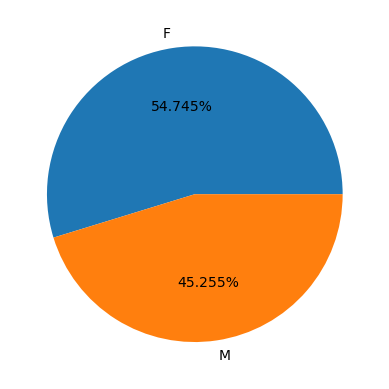

In [10]:
sex = df.gender.unique()
number = df.gender.value_counts().values
fig,ax = plt.subplots()
ax.pie(number , labels =sex ,autopct = '%1.3f%%' )
plt.show()

some basic deductions from this results can be

1.the dataset contains more transactions by female than males, as the percentage of female transactions is higher than the percentage of male transactions
2.There may be diffrences in the spending habits or patterns between gender, as the percentages are not equall.
3.Females are targeted more often than males or the males are more likely to report fruadulent activity.(we will need further analysis to detect that )
4.The proportion of female transactions is significantly higher than the proportion of male.However, we cannot confer causation


In [ ]:
outcome = df.is_fraud.value_counts()
not_fraud = (outcome[0]/(outcome[0]+ outcome[1]))*100
fraud = (outcome[1]/(outcome[0]+ outcome[1]))*100
percent_fraud = (not_fraud - fraud)

print('The percentage of transactions that are not fruadulent is about ', round(not_fraud, 3))
print('The percentage of transactions that are considered fruadulent is about ', round(fraud, 3))
print('About', round(percent_fraud,3),'of the dataset is considered fruadulent free transactions')

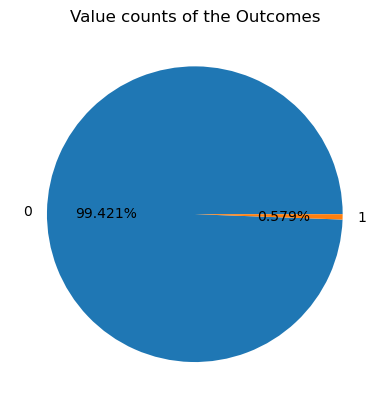

In [11]:
labels = df.is_fraud.unique()
size = df.is_fraud.value_counts().values
size

fig,ax = plt.subplots()
ax.pie(size, labels = labels, autopct = '%1.3f%%')
ax.set_title('Value counts of the Outcomes')
plt.show()

**bold text**### DEDUCTIONS 
1. It can be observed from the dataset that vast majority of the transactions are not fraudulent with abbout 99.143% of transactions condisdered non-fraudulent. In other words, this dataset contains a relatively small number of fraudulent transactions overall.
2. Since there is about 0.846% of fraudulent transactions recorded,there is still a risk of credit card being considered fraudulent.
3. This also shows that the data is highly unbalanced hence various techniques should be used and appraoched with caution.

In [ ]:
 import seaborn as sns
 sex_transaction = df.gender.value_counts()
 print(sex_transaction)

In [ ]:
print(np.percentile(df.amt, 90))

#Observations 
1. The distribution of the amount involved in the transaction is not systematic, hence making the dataset skewed
2. There is a significant number of high value transactions in the dataset hence the 90th percentile value will not be a good representation of the transaction amount in the dataset since there are more higher transaction amounts.


In [ ]:
correlation = df.corr()
correlation

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(correlation, annot =True)
plt.title('Feature Corrleations')
plt.show()



####Feature engineeering 
we will create new features in the dataset so we can improve the performance of the model
1. we will add time based features. where we belief fraudulent transactions can occur at certian times or days of the week
2. transaction amount features where fraudlent transactions can occur at certian amounts. some amounts can be flagged at certain thresholds
3. card related features where some cards can be flagged as red alerts.
4. Geographical features too can be added to the dataset, where fraudulent transactions can occur from certian locations 


In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['date'] = df['trans_date_trans_time'].dt.date
df['time'] = df['trans_date_trans_time'].dt.time
df['amount_log'] = np.log(df['amt'] + 0.01)
df['mean_amount'] = (df['amt']) - (df['amt'].mean())


In [ ]:
df['count_cards']= df.groupby('cc_num')['cc_num'].transform('count')

In [ ]:
df['location'] = ((df['merch_lat'] - df['lat'])**2 + (df['merch_long'] - df['long'])**2)*0.5

df['location_transaction'] = df.groupby(['merch_lat', 'merch_long'])['merch_lat'].transform('count')

df.groupby(['merch_lat', 'merch_long'])['merch_lat'].transform('count')

In [ ]:
featured_data = df.drop(['date', 'dob','trans_date_trans_time','first', 'last', 'gender', 'city', 'state', 'zip','amt','category','amount_log','merch_lat', 'merch_long','lat', 'long'], axis = 1)

In [ ]:
corr = featured_data.corr()
corr

In [ ]:
corr['is_fraud']

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot =True)
plt.show()

### Data Preprocessing
Normalising the dataset to prevent it from being biased. the mean amount values in the data set has a much larger range of values than other feature and it can dominate the learning process of the algorithm leading to a biased prediction.

In [ ]:
x = featured_data.drop('is_fraud', axis = 1)
y = featured_data['is_fraud']

print('the shape of x is', x.shape )
print ('the shape of y is',y.shape)
print(y.head(2))
featured_data.columns

In [ ]:
sc = StandardScaler()
new_x = sc.fit_transform(x.select_dtypes(include = ['float64','int64']))
print(new_x.shape ,y.shape)

## Normalising the dataset so the assumption of normality can be achieved

In [ ]:
norm_x = normalize(new_x , norm ='l1')
print(norm_x.shape, y.shape)

#### Model development 

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(norm_x, y, test_size = .3, random_state = 43, stratify = y)
print(x_train.shape, x_test.shape,y_test.shape, y_train.shape)

In [ ]:
w_train = compute_sample_weight('balanced', y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth = 4, random_state=35)

In [ ]:
dt.fit(x_train,y_train, sample_weight = w_train)


In [ ]:
from snapml import DecisionTreeClassifier
s_dt = DecisionTreeClassifier(max_depth =4, random_state = 45, n_jobs = 4)
s_dt.fit(x_train, y_train, sample_weight = w_train)

sklearn_pred = dt.predict_proba(x_test)[:,1]
snapml_pred = s_dt.predict_proba(x_test)[:,1]

In [ ]:
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

snapml_roc_auc = roc_auc_score(y_test, snapml_pred)   
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

In [ ]:
from snapml import SupportVectorMachine

In [ ]:
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
print(snapml_svm.get_params())

In [ ]:
model = snapml_svm.fit(x_train, y_train)

In [ ]:
#sklearn_pred = sklearn_svm.decision_function(x_test)
snapml_pred = snapml_svm.decision_function(x_test)

In [ ]:
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))